In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel(r"C:\Dersler\Statistics for Big Data Prog and data analysis\data analysis\RegressionData.xls")

In [2]:
data

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp
0,Male,43,15,Manager,57000,27000,98,144
1,Male,37,16,Clerical,40200,18750,98,36
2,Female,66,12,Clerical,21450,12000,98,381
3,Female,48,8,Clerical,21900,13200,98,190
4,Male,40,15,Clerical,45000,21000,98,138
...,...,...,...,...,...,...,...,...
469,Male,31,12,Clerical,26250,15750,64,69
470,Male,29,15,Clerical,26400,15750,64,32
471,Male,29,15,Clerical,39150,15750,63,46
472,Female,58,12,Clerical,21450,12750,63,139


In [3]:
data["man"]=np.where(data["jobcat"].str.contains("Manager"), 1, 0)   

In [4]:
data["cle"]=np.where(data["jobcat"].str.contains("Clerical"), 1, 0)   

In [6]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,man,cle
0,Male,43,15,Manager,57000,27000,98,144,1,0
1,Male,37,16,Clerical,40200,18750,98,36,0,1
2,Female,66,12,Clerical,21450,12000,98,381,0,1
3,Female,48,8,Clerical,21900,13200,98,190,0,1
4,Male,40,15,Clerical,45000,21000,98,138,0,1


In [14]:
data.head()

,gender,age,educ,jobcat,salary,salbegin,jobtime,prevexp,man,cle,male
0,Male,43,15,Manager,57000,27000,98,144,1,0,0
1,Male,37,16,Clerical,40200,18750,98,36,0,1,0
2,Female,66,12,Clerical,21450,12000,98,381,0,1,1
3,Female,48,8,Clerical,21900,13200,98,190,0,1,1
4,Male,40,15,Clerical,45000,21000,98,138,0,1,0


In [7]:
data["male"]=np.where(data["gender"].str.contains("male"), 1, 0)

In [9]:
import statsmodels.api as sm
X = data.loc[:,["age","educ","jobtime","male","man","cle",]]

In [10]:
X = sm.add_constant(X)

In [11]:
y = data["salary"]
lm = sm.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          6.42e-129
Time:                        09:51:51   Log-Likelihood:                -4982.1
No. Observations:                 474   AIC:                             9978.
Df Residuals:                     467   BIC:                         1.001e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.121e+04   4742.415      2.363      0.019    1888.739    2.05e+04
age          -61.0209     37.956     -1.608      0.109    -135.606      13.564
educ        1402.5773    200.541      6.994      0.000    1008.503    1796.651
jobtime      106.8694     41.131      2.598      0.010      26.045     187.693
male       -5166.6101    956.560     -5.401      0.000   -7046.304   -3286.916
man         2.274e+04   2468.405      9.214      0.000    1.79e+04    2.76e+04
cle        -4825.8292   2048.656     -2.356      0.019   -8851.554    -800.104
==============================================================================
Omnibus:                      257.912   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2914.298
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      14.393   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns                                                         
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

   feature         VIF
0    const  133.147407
1      age    1.179380
2     educ    1.977276
3  jobtime    1.011637
4     male    1.343614
5      man    5.259611
6      cle    4.455992


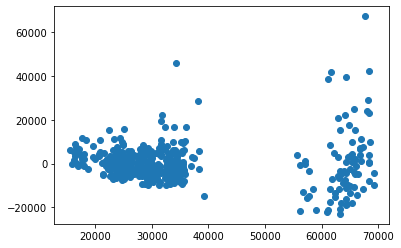

In [11]:
import matplotlib.pyplot as plt
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)

In [40]:
from statsmodels.stats.diagnostic import het_white

In [41]:
white_test = het_white(model.resid,  model.model.exog)

In [42]:
labels=("LM Statistic","LM-Test p-value", "F-Statistic", "F-Test p-value")
print(labels, white_test)

('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value') (85.42777617692734, 2.0305022741185173e-09, 4.506934114838869, 1.8483226738713494e-10)


In [48]:
X = data.loc[:,["age","educ","jobtime","male","man","cle"]]
y = np.log(data["salary"])
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     261.5
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          8.25e-146
Time:                        14:40:25   Log-Likelihood:                 114.34
No. Observations:                 474   AIC:                            -214.7
Df Residuals:                     467   BIC:                            -185.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9258      0.102     97.782      0.000       9.726      10.125
age           -0.0040      0.001     -4.903      0.000      -0.006      -0.002
educ           0.0397      0.004      9.254      0.000       0.031       0.048
jobtime        0.0027      0.001      3.072      0.002       0.001       0.004
male          -0.1618      0.020     -7.903      0.000      -0.202      -0.122
man            0.3638      0.053      6.886      0.000       0.260       0.468
cle           -0.2102      0.044     -4.793      0.000      -0.296      -0.124
==============================================================================
Omnibus:                       50.009   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.793
Skew:                           0.726   Prob(JB):                     9.46e-17
Kurtosis:                       4.276   Cond. No.                     1.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

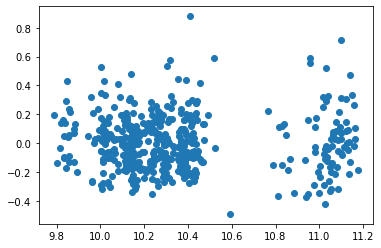

In [49]:
x=model.fittedvalues
y=model.resid
plt.scatter(x, y)

In [50]:
white_test = het_white(model.resid,  model.model.exog)

In [51]:
labels=("LM Statistic","LM-Test p-value", "F-Statistic", "F-Test p-value")
print(labels, white_test)

('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value') (35.00604199746055, 0.03868877572737187, 1.6347009972829518, 0.03551248376775047)


## LASSO Regression

In [95]:
from sklearn.linear_model import Lasso
X = data.loc[:,["age","educ","jobtime","male","man","cle"]]
y = np.log(data["salary"])
X= sm.add_constant(X)                                    # y: logsal
lasso_model = Lasso(alpha = 0.2).fit(X, y)               #model for alpha=0,2

In [96]:
lasso_model
lasso_model.coef_                      #coefficients for alpha 0,2

array([ 0.        , -0.00098446,  0.07062488,  0.00075882, -0.        ,
        0.        , -0.        ])

In [97]:
from sklearn.linear_model import LassoCV     
lasso_cv_model = LassoCV(alphas = None, cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X,y)
lasso_cv_model.alpha_                                         # finding optimum alpha 

7.654123817065376e-05

In [20]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)

In [21]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

0.1901070392475902

In [98]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 7.65e-05).fit(X, y)

In [99]:
lasso_model
lasso_model.coef_

array([ 0.        , -0.00398185,  0.03979643,  0.00270413, -0.16149027,
        0.36284219, -0.21041151])

## Y is salary not logsal again LASSO

In [66]:
X = data.loc[:,["age","educ","jobtime","male","man","cle"]]            # y logaritmic değil
y = data["salary"]
X= sm.add_constant(X)
lasso_model = Lasso(alpha = 0.3).fit(X, y)

In [69]:
from sklearn.linear_model import LassoCV     
lasso_cv_model = LassoCV(alphas = None, cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X,y)
lasso_cv_model.alpha_

3.3625544197716346

In [70]:
lasso_model
lasso_model.coef_ 

array([    0.        ,   -61.0148584 ,  1402.86952995,   106.86612459,
       -5165.38096259, 22741.09495373, -4826.79872684])

In [73]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X, y)
y_pred = lasso_tuned.predict(X)

In [74]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, y_pred))

8881.617545806756

In [75]:
lasso_model = Lasso(alpha = lasso_cv_model.alpha_).fit(X, y)

In [76]:
lasso_model
lasso_model.coef_ 

array([    0.        ,   -60.95322868,  1405.85661842,   106.8326512 ,
       -5152.82669867, 22702.60191428, -4836.73485383])

## RIDGE Regression

In [100]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.4).fit(X, y)         # alfa 0.4 
ridge_model.coef_

array([ 0.        , -0.00398954,  0.04010758,  0.00270254, -0.16085799,
        0.3570345 , -0.21372064])

In [101]:
from sklearn.linear_model import RidgeCV         # MSE min yapan alfa bulunuyor sonra o alfa değeri ile katsayılar
lambdalar = 10**np.linspace(10,-2,100)*0.5         # tekrar hesaplanır.

In [102]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [103]:
ridge_model = Ridge()
katsayilar = []

In [104]:
for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X, y) 
    katsayilar.append(ridge_model.coef_) 

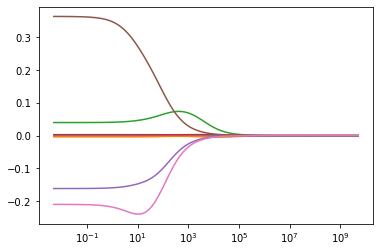

In [105]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

In [106]:
from sklearn.linear_model import RidgeCV                           # optimum alpha minimizes error
ridge_cv=RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error", normalize=True) 

In [107]:
ridge_cv.fit(X,y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [108]:
ridge_cv.alpha_      

0.03527401155359316

In [109]:
ridge_model = Ridge(alpha = ridge_cv.alpha_).fit(X, y)           # coefficients with optimum alfa 
ridge_model.coef_
#The first variable has a value of zero so it is insignificant for model.

array([ 0.        , -0.003984  ,  0.03975693,  0.00270475, -0.1617173 ,
        0.36318103, -0.2104966 ])